In [7]:
import skimage.io as sk
import numpy as np
from Functions import image_processing as ip
from Functions import dice_score as ds

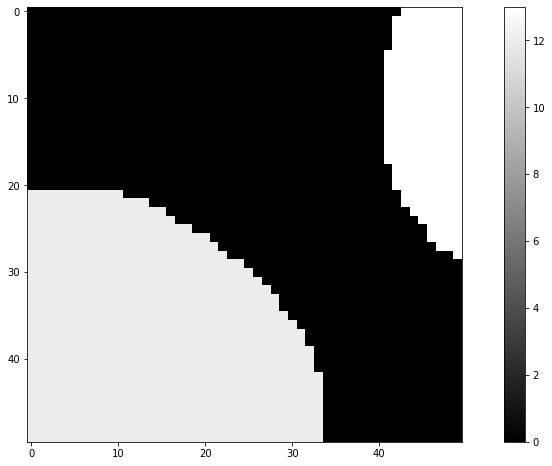

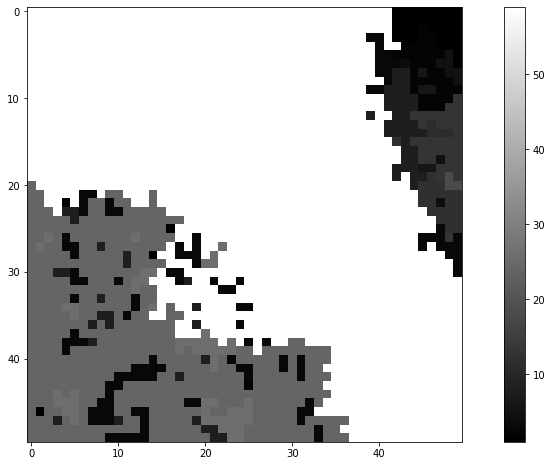

In [8]:
gt = sk.imread("../Data/N2DH-GOWT1/gt/man_seg01.tif")
gt_resize = gt[300:350, 400:450]
ip.show_image(gt_resize,15,8)

segmented_image = sk.imread("../t01tifimg.tif")
ip.show_image(segmented_image,15,8)


In [9]:
dice_score_weight = ds.evaluate_accuracy_weighted(segmented_image, gt_resize)
dice_score_unweight = ds.evaluate_accuracy_unweighted(segmented_image, gt_resize)
print(dice_score_weight)
print(dice_score_unweight)

0.922304174427804
0.9264
